## Sofía Biermann 
# Entrega final: gráficos 

In [1]:
import sqlite3

In [2]:
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
connection =sqlite3.connect ("music.db")

In [5]:
datos = pd.read_sql_query ("SELECT * FROM playlists", connection)

In [6]:
print (datos.head())

   slice  pid  modified_at  num_tracks  num_albums  num_followers  num_edits  \
0  0-999    0   1493424000          52          47              1          6   
1  0-999    1   1506556800          39          23              1          5   
2  0-999    2   1505692800          64          51              1         18   
3  0-999    3   1501027200         126         107              1          4   
4  0-999    4   1401667200          17          16              2          7   

   duration_ms  num_artists  
0     11532414           37  
1     11656470           21  
2     14039958           31  
3     28926058           86  
4      4335282           16  


# 1. Histograma 

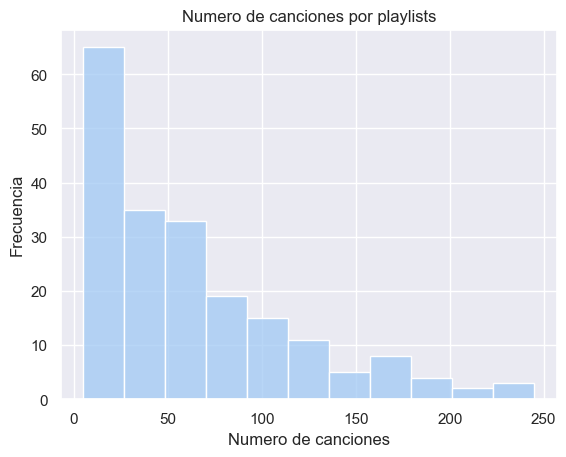

In [32]:
sns.histplot (datos, x= "num_tracks")
plt.title ("Numero de canciones por playlists")
plt.xlabel ("Numero de canciones")
plt.ylabel ("Frecuencia")
sns.set_theme(palette= "pastel")

## Interpretación
El siguiente gráfico nos permite visualizar la manera en la que se distribuye el número de canciones en las playlists. El eje x representa los intervalos de la variable numérica num_tracks, y el eje y nos indica la frecuencia de estos datos en cada intervalo. De esta forma, la distribución de los bins nos muestra que la mayor cantidad de playlists tienen pocas canciones, y que, consecuentemente, hay pocas playlists con un numero alto de canciones. Se puede concluir, entonces, que hay una tendencia decreciente en las playlists a medida que aumenta el número de canciones.  


# 2. Gráfico de Relación

In [8]:
datos = pd.read_sql_query ("SELECT * FROM playlists", connection)

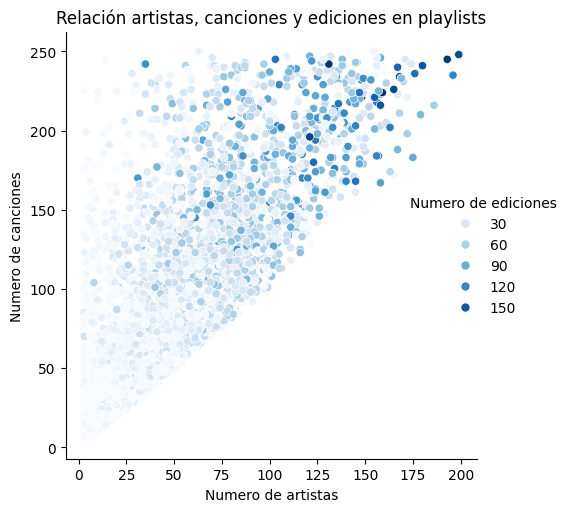

In [9]:
g = sns.relplot (datos, x= "num_artists" , y= "num_tracks", hue= "num_edits", palette = "Blues")
plt.title ("Relación artistas, canciones y ediciones en playlists")
plt.xlabel ("Numero de artistas")
plt.ylabel ("Numero de canciones")
new_legend_title = "Numero de ediciones"
g.legend.set_title (new_legend_title)

## Interpretación 
El siguiente gráfico de dispersión nos permite establecer una relación entre tres variables cuantitativas, el número de artistas (x), el numero de canciones (y) y el número de ediciones (hue) en las playlists. La imagen nos permite ver que existe una relación positiva entre el numero de canciones y artistas, haciendo que al aumentar el número de artistas en cada playlist, también aumenta el número de canciones. Ahora ben, la concentración de los puntos en la esquina inferior izquierda del gráfico indica que tanto canciones como artistas son predominantemente pocos en cada playlist. Además, el color de los puntos en el gráfico nos permite ver como la mayoría de playlists no son editadas de forma recurrente, y que además, las que son editadas con mayor frecuencia son las que tienen una mayor cantidad de artistas y canciones, aunque sean pocas.

# 3. Gráfico Categórico

In [15]:
datos2 = pd.read_sql_query ("SELECT * FROM song", connection)

In [16]:
print (datos2.head())

                              track_uri  pid  pos  \
0  spotify:track:4SDywo3ykB2PEthjXvo1UP    6    0   
1  spotify:track:229SqGbacrLSBfb9XfJczF    6    1   
2  spotify:track:0orNm6qQT2B5WFi0l7l3PV    6    2   
3  spotify:track:1hWQvA6oGVJ2mAVsZ59AaV    6    3   
4  spotify:track:56SkdBKyR2zOkjk6wVFI9s    6    4   

                             artist_name  \
0           Creedence Clearwater Revival   
1                                 STRFKR   
2                                    311   
3  Nathaniel Rateliff & The Night Sweats   
4                                Toadies   

                              artist_uri              track_name  \
0  spotify:artist:3IYUhFvPQItj6xySrBmZkd    I Put A Spell On You   
1  spotify:artist:2Tz1DTzVJ5Gyh8ZwVr6ekU           Bury Us Alive   
2  spotify:artist:41Q0HrwWBtuUkJc7C1Rp6K  Jackolantern's Weather   
3  spotify:artist:02seUFsFQP7TH4hLrTj77o                  S.O.B.   
4  spotify:artist:2QMMktUMtwMSwUZATX1cRO          Possum Kingdom   

       

In [21]:
top_tracks = datos2["track_name"].unique()[:10]

In [22]:
muestreo_peque = datos2[datos2["track_name"].isin(top_tracks)]

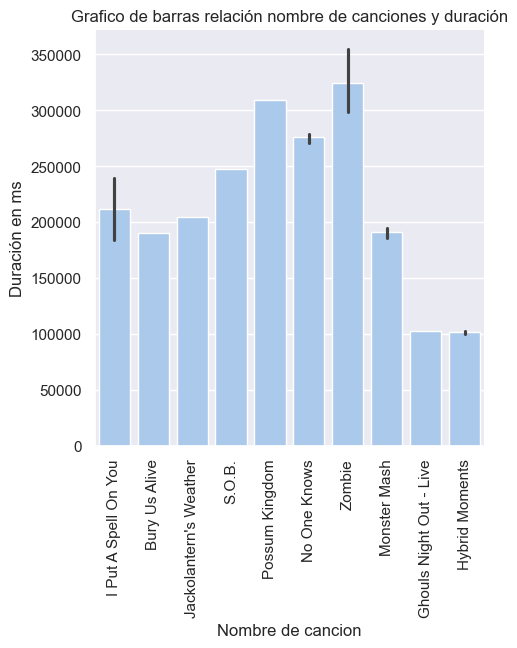

In [31]:
sns.catplot(data=muestreo_peque, x="track_name", y="duration_ms", kind="bar")
plt.title ("Grafico de barras relación nombre de canciones y duración")
plt.xlabel ("Nombre de cancion")
plt.ylabel ("Duración en ms")
plt.xticks (rotation = 90)
sns.set_theme(palette= "pastel")

## Interpretación
El anterior grafico categorico permite establecer una relación entre una variable cuantitativa (la duración de las canciones) y una variable cualitativa (un muestreo pequeño de las primeras 10 canciones) que se encuentran en el dataframe song. Cada una de las barras que se encuentran sobre el eje x nos muestran la duración promedio de cada una de estas canciones, teniendo algunas de estas una variabilidad o incertidumbre mayor en la duración, representada con las líneas negras (entre mas larga la linea, mayor es el intervalo de confianza, y por ende mayor es la incertidumbre sobre la variación de la duración de la canción). Ahora bien, el gráfico nos permite ver que hay una variabilidad significativa en la duración de las canciones, siendo "zombie" la canción más larga de este pequeño muestreo y "ghouls night out" y "hybrid moments" las canciones más cortas. Aunque la base de datos no lo permite por las variables que contiene, la interpretación de este gráfico podría hacerse más interesante si se estudiaran otras variables, como el género de las canciones o el año de lanzamiento, para ver si existe una correlación entre estos factores y la duración de las canciones. 

# 4. Gráfico de Matriz

In [10]:
datos = pd.read_sql_query ("SELECT * FROM playlists", connection)

Text(0.5, 1.0, 'Grafico de correlación de las variables en playlists')

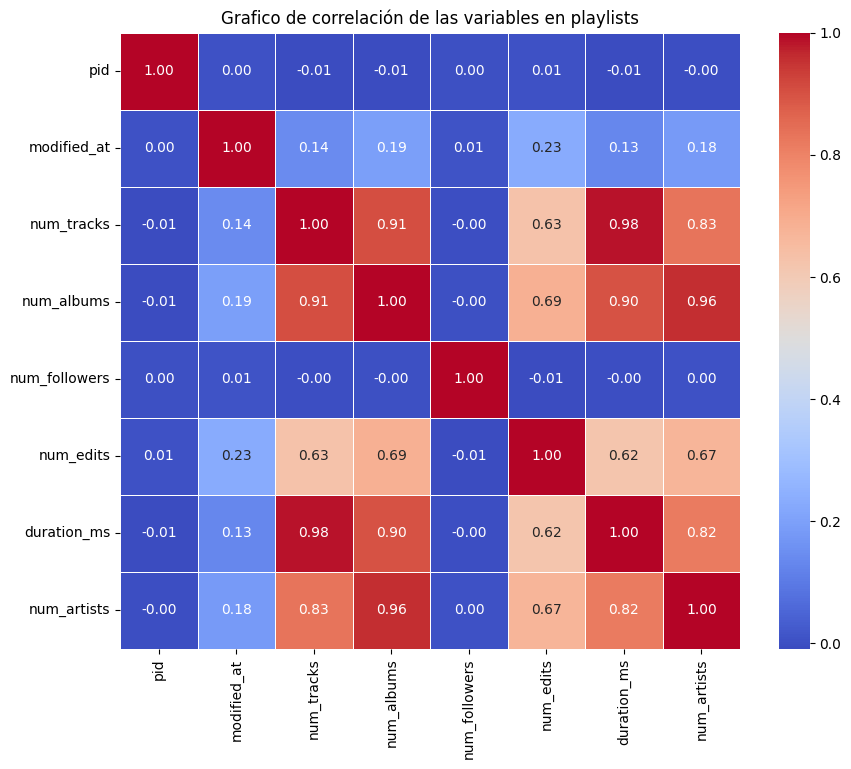

In [13]:
plt.figure (figsize = (10,8))
numeric_datos = datos.select_dtypes(include=[float, int])
corr = numeric_datos.corr ()
sns.heatmap (corr, annot= True, cmap = "coolwarm", fmt =".2f", linewidth =.5)
plt.title("Grafico de correlación de las variables en playlists")

## Interpretación
El grafico anterior permite hacer una interpretación de la correlación entre las variables numéricas de la base de datos de playlist, indicando con rangos de 1 a -1 o de rojo a azul el grado de correlación entre las variables. De esta forma, las variables que se representan en color rojo o con 1 manifiestan una correlación positiva, mientras las variables que se presentan en color azul oscuro o con -1 manifiestan una correlación negativa, dejando el 0 o el color azul claro a las variables que no tienen correlación. 

Es posible ver que las variables que presentan mayor correlación son el número de canciones y la duración de la playlist (con un valor de 0.98), indicando que entre más canciones tiene una playlist, mayor será su duración. Ahora el número de canciones y el número de álbumes (con un valor de 0.91) también tiene una correlación alta, indicando que las playlists que tienen más canciones, también tieneden a tener más álbumes. Otra correlación interesante es la de el número de albumes y el numero de artistas (con un valor de 0.96), haciendonos ver que a mayor número de álbumes, mayor será también la variedad de artistas que contiene una playlist. Ahora, es posible ver que el pid, osea el identificador de cada playlist, mantiene una correlación nula con las demás variables, y que el número de followers mantiene una correlación baja con las demás variables, lo que puede indicar que el número de seguidores no esta correlacionado con el número de canciones, artistas, o álbumes, que contiene cada playlist. 

# 5. Gráfico de regresión

In [11]:
datos = pd.read_sql_query ("SELECT * FROM playlists LIMIT 200", connection)

Text(24.765624999999993, 0.5, 'Numero de ediciones')

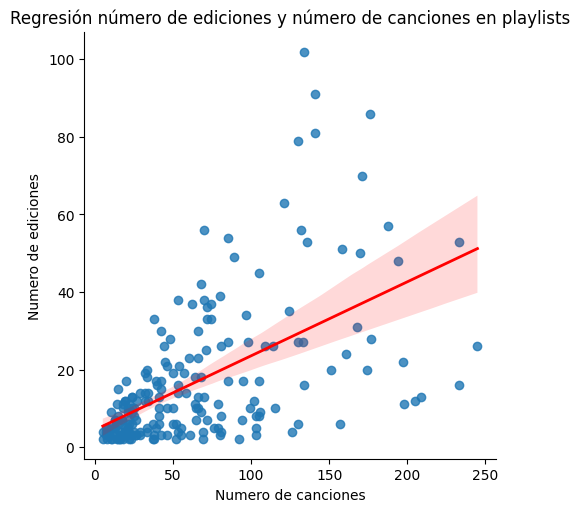

In [13]:
sns.lmplot (datos, x= "num_tracks", y="num_edits", line_kws={'color':'red', 'linewidth' : 2})
plt.title ("Regresión número de ediciones y número de canciones en playlists")
plt.xlabel ("Numero de canciones")
plt.ylabel ("Numero de ediciones")

## Interpretación
El gráfico muestra la relación entre el numero de ediciones y el numero de canciones en playlists. A primera vista, al ver la línea de regresión es posible ver que hay una relación positiva entre las dos variables, es decir, que cuando aumenta el número de canciones de una playlist, aumenta también el número de ediciones. Sin embargo, al ver la dispersión de los puntos, que aumenta significativamente a medida que el número de canciones aumenta, es posible concluir que si bien hay una tendencia a que las playlists con mas canciones sean las mas editadas, la variabilidad es muy grande, lo que hace difícil una estimación segura e indiscutible en la regresión. Esto nos indica que, tal vez, hay otras variables que también influyen en el número de ediciones de una playlist, y no solo el número de canciones. 